### Project Name:Covid19 data Analysis and Making prediction Using Simple ML Algorithm.
**Author : Nosin Ibna Mahbub**
 

In [1]:
#importing all libries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
%matplotlib inline

In [2]:
# Loading the dataset
df=pd.read_csv('data.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
39145,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-19,693,12,199,482,Africa
39146,NaN,Yemen,15.552727,48.516388,2020-06-19,919,251,288,380,Eastern Mediterranean
39147,NaN,Comoros,-11.645500,43.333300,2020-06-19,210,5,129,76,Africa
39148,NaN,Tajikistan,38.861034,71.276093,2020-06-19,5338,51,3830,1457,Europe


In [42]:
#shape of dataset
df.shape

(39150, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39150 entries, 0 to 39149
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11700 non-null  object 
 1   Country/Region  39150 non-null  object 
 2   Lat             39150 non-null  float64
 3   Long            39150 non-null  float64
 4   Date            39150 non-null  object 
 5   Confirmed       39150 non-null  int64  
 6   Deaths          39150 non-null  int64  
 7   Recovered       39150 non-null  int64  
 8   Active          39150 non-null  int64  
 9   WHO Region      39150 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [5]:
# checking null value
df.isnull().sum()

Province/State    27450
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [6]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [7]:
#Converting Date(string) column into date-time format(y/m/d) and make a new column ObservationDate
df['ObservationDate']=pd.to_datetime(df['Date'])

In [8]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,ObservationDate
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-22
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2020-01-22
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,2020-01-22
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,2020-01-22
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,2020-01-22
...,...,...,...,...,...,...,...,...,...,...,...
39145,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-19,693,12,199,482,Africa,2020-06-19
39146,NaN,Yemen,15.552727,48.516388,2020-06-19,919,251,288,380,Eastern Mediterranean,2020-06-19
39147,NaN,Comoros,-11.645500,43.333300,2020-06-19,210,5,129,76,Africa,2020-06-19
39148,NaN,Tajikistan,38.861034,71.276093,2020-06-19,5338,51,3830,1457,Europe,2020-06-19


# Analysis according to date

In [9]:
datewise=df.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'})

In [10]:
datewise

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
...,...,...,...,...
2020-06-15,8033720,436883,3794955,3801882
2020-06-16,8173199,443669,3892350,3837180
2020-06-17,8349209,448943,4009755,3890511


In [11]:
print("Total number  of Confirmed cases : ",datewise['Confirmed'].iloc[-1])
print("Total number of Deaths cases: ",datewise['Deaths'].iloc[-1])
print('Total number of Recovered cases : ',datewise['Recovered'].iloc[-1])
print('Total number of Active cases :',datewise['Active'].iloc[-1])
print('Total number of closed cases: ',datewise['Deaths'].iloc[-1]+datewise['Recovered'].iloc[-1])

Total number  of Confirmed cases :  8662394
Total number of Deaths cases:  459989
Total number of Recovered cases :  4180522
Total number of Active cases : 4021883
Total number of closed cases:  4640511


## ploting  Active case according to time

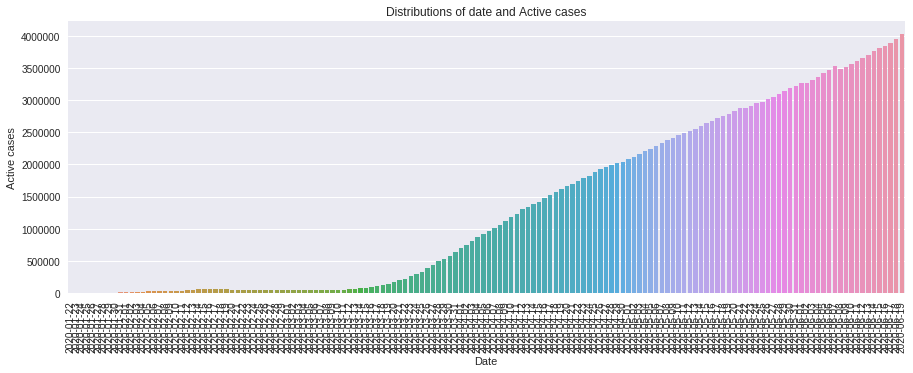

In [12]:

plt.style.use('seaborn')
plt.figure(figsize=(15,5)) 
sns.barplot(x=datewise.index.date,y=datewise['Active'])
plt.title('Distributions of date and Active cases')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.xticks(rotation=90)
plt.show()

## Death cases according to time

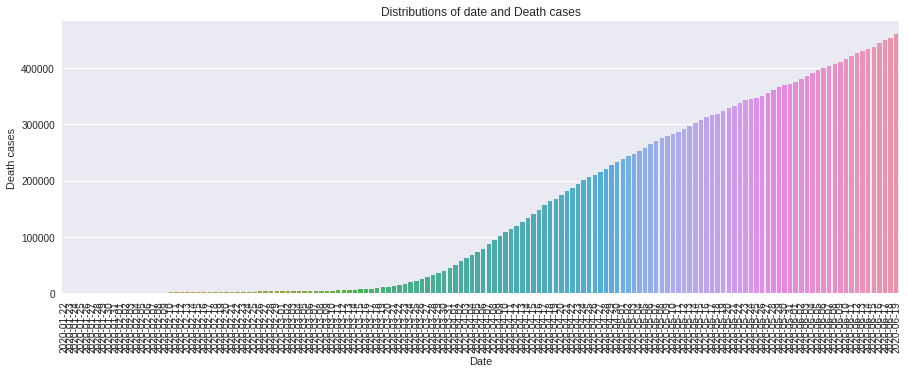

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5)) 
sns.barplot(x=datewise.index.date,y=datewise['Deaths'])
plt.title('Distributions of date and Death cases')
plt.xlabel('Date')
plt.ylabel('Death cases')
plt.xticks(rotation=90)
plt.show()

## Analysis according to number of week

Text(0.5, 1.0, 'Weekly progress of different types of cases')

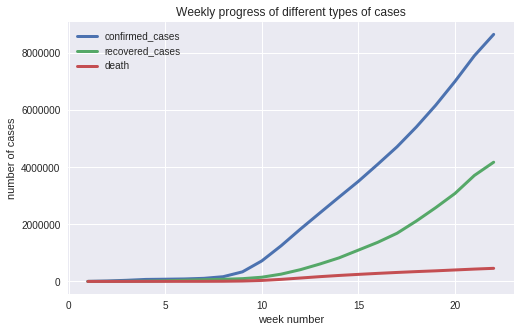

In [14]:
datewise['WeekofYear']=datewise.index.weekofyear
week_number=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise['WeekofYear'].unique()):
    weekwise_confirmed.append(datewise[datewise['WeekofYear']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['WeekofYear']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['WeekofYear']==i]['Deaths'].iloc[-1])
    week_number.append(w)
    w=w+1
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
plt.plot(week_number,weekwise_confirmed,linewidth=3,label="confirmed_cases")
plt.plot(week_number,weekwise_recovered,linewidth=3,label="recovered_cases")
plt.plot(week_number,weekwise_deaths,linewidth=3,label="death")
plt.legend()
plt.xlabel('week number')
plt.ylabel('number of cases')
plt.title('Weekly progress of different types of cases')

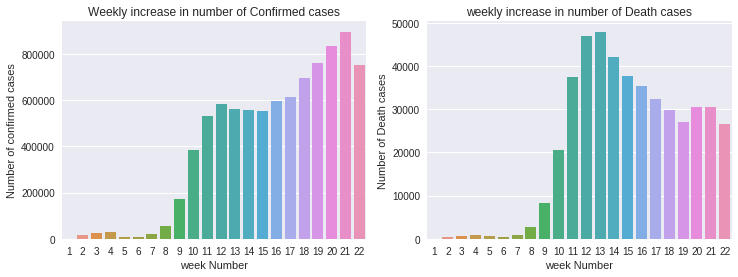

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_number,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week Number")
ax2.set_xlabel("week Number")
ax1.set_ylabel("Number of confirmed cases")
ax2.set_ylabel('Number of Death cases')
ax1.set_title('Weekly increase in number of Confirmed cases')
ax2.set_title("weekly increase in number of Death cases")
plt.show()


## Average number of increase cases

Average increase in number of confirmed cases everyday:  57746.0
Average increase in number of Recovered cases everyday:  27870.0
Average increase in number of Deaths cases everyday:  3066.0


(array([737456., 737485., 737516., 737546., 737577.]),
 <a list of 5 Text xticklabel objects>)

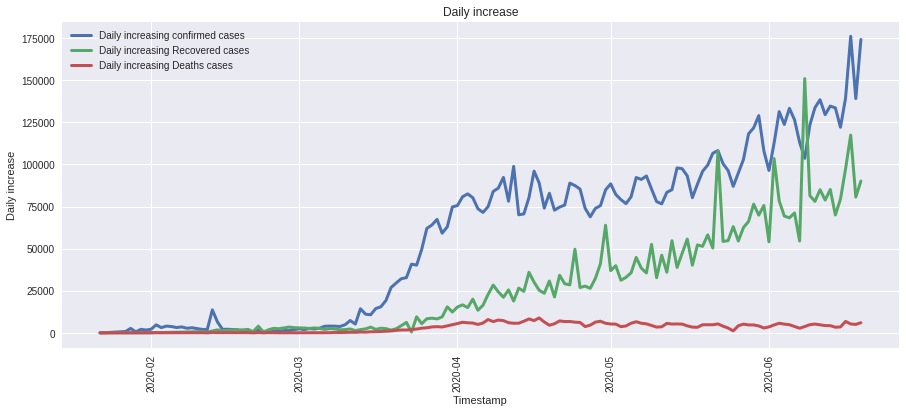

In [16]:
print('Average increase in number of confirmed cases everyday: ',np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print('Average increase in number of Recovered cases everyday: ',np.round(datewise['Recovered'].diff().fillna(0).mean()))
print('Average increase in number of Deaths cases everyday: ',np.round(datewise['Deaths'].diff().fillna(0).mean()))
plt.figure(figsize=(15,6))
plt.plot(datewise['Confirmed'].diff().fillna(0),label='Daily increasing confirmed cases',linewidth=3)
plt.plot(datewise['Recovered'].diff().fillna(0),label='Daily increasing Recovered cases',linewidth=3)
plt.plot(datewise['Deaths'].diff().fillna(0),label='Daily increasing Deaths cases',linewidth=3)
plt.xlabel('Timestamp')
plt.ylabel('Daily increase')
plt.title('Daily increase')
plt.legend()
plt.xticks(rotation=90)

## Countrywise analysis

In [17]:
countrywise=df[df['ObservationDate']==df['ObservationDate'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)
countrywise["Mortality"]=(countrywise['Deaths']/countrywise['Recovered'])*100
countrywise["Recoverity"]=(countrywise['Recovered']/countrywise['Confirmed'])*100

In [18]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recoverity
Country/Region,,,,,
US,2220961,606715,119112,19.632282,27.317679
Brazil,1032913,551631,48954,8.874411,53.405369
Russia,568292,323851,7831,2.418087,56.986725
India,395048,213831,12948,6.055249,54.127853
United Kingdom,303285,1319,42546,3225.625474,0.434904
...,...,...,...,...,...
Holy See,12,12,0,0.000000,100.000000
Seychelles,11,11,0,0.000000,100.000000
Western Sahara,9,8,1,12.500000,88.888889


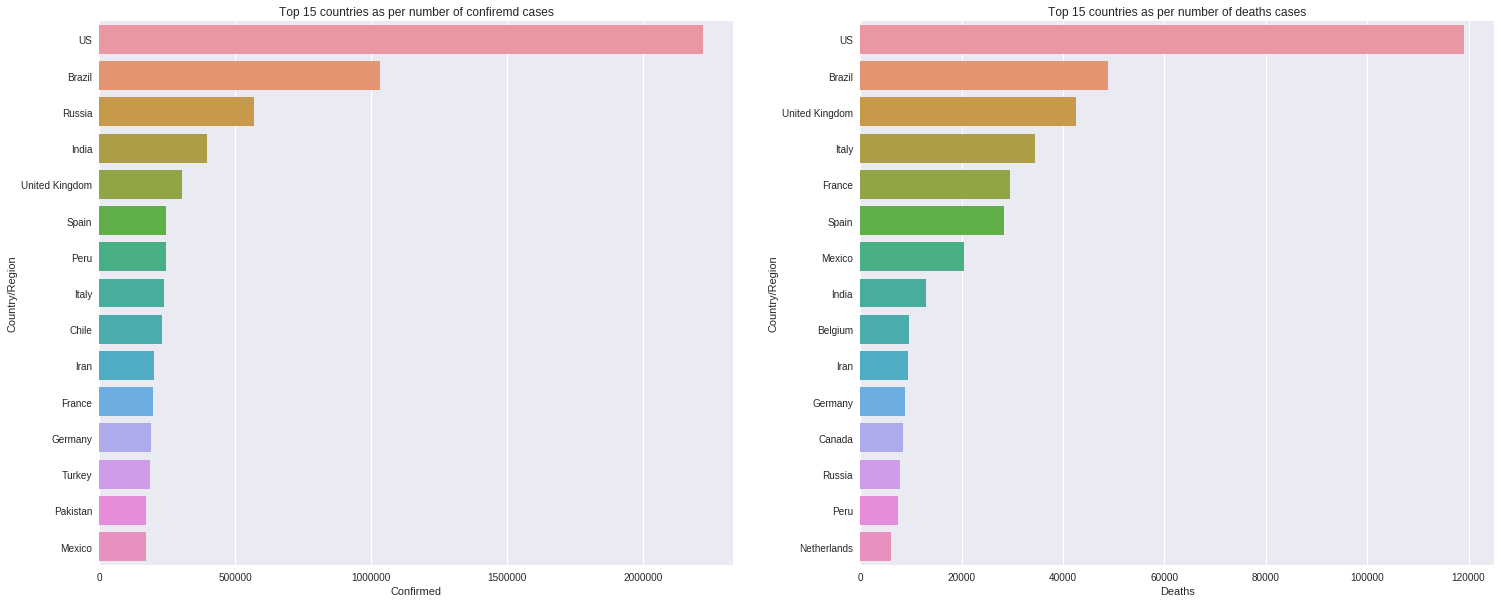

In [19]:
plt.style.use('seaborn')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)

ax1.set_title('Top 15 countries as per number of confiremd cases')
ax2.set_title("Top 15 countries as per number of deaths cases")
plt.show()

# Data Analysis for Bangladesh

In [20]:
bd_data=df[df["Country/Region"]=='Bangladesh']
datewise_bd=bd_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
datewise_bd

,Confirmed,Recovered,Deaths,Active
ObservationDate,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-06-15,90619,18731,1209,70679
2020-06-16,94481,36264,1262,56955
2020-06-17,98489,38189,1305,58995


In [21]:
print('Total number of Confirmed cases in bd : ',datewise_bd['Confirmed'].iloc[-1])
print('Total number of Recovered cases in bd : ',datewise_bd['Recovered'].iloc[-1])
print('Total number of Deaths cases in bd : ',datewise_bd['Deaths'].iloc[-1])
print('Total number of Active cases in bd : ',datewise_bd['Active'].iloc[-1])

Total number of Confirmed cases in bd :  105535
Total number of Recovered cases in bd :  42945
Total number of Deaths cases in bd :  1388
Total number of Active cases in bd :  61202


# Weekly analysis of bangladesh data

Text(0.5, 1.0, 'Weekly progress of different types of cases')

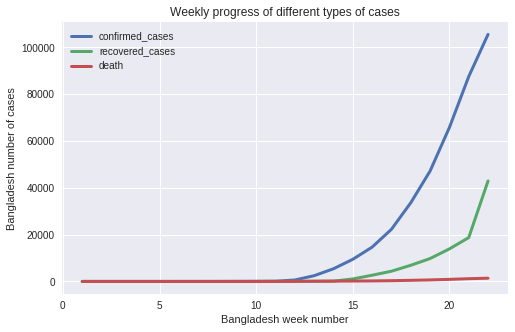

In [22]:
datewise_bd['WeekofYear']=datewise_bd.index.weekofyear
bd_week_number=[]
bd_weekwise_confirmed=[]
bd_weekwise_recovered=[]
bd_weekwise_deaths=[]
w=1
for i in list(datewise_bd['WeekofYear'].unique()):
    bd_weekwise_confirmed.append(datewise_bd[datewise_bd['WeekofYear']==i]['Confirmed'].iloc[-1])
    bd_weekwise_recovered.append(datewise_bd[datewise_bd['WeekofYear']==i]['Recovered'].iloc[-1])
    bd_weekwise_deaths.append(datewise_bd[datewise_bd['WeekofYear']==i]['Deaths'].iloc[-1])
    bd_week_number.append(w)
    w=w+1
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
plt.plot(bd_week_number,bd_weekwise_confirmed,linewidth=3,label="confirmed_cases")
plt.plot(bd_week_number,bd_weekwise_recovered,linewidth=3,label="recovered_cases")
plt.plot(bd_week_number,bd_weekwise_deaths,linewidth=3,label="death")
plt.legend()
plt.xlabel('Bangladesh week number')
plt.ylabel('Bangladesh number of cases')
plt.title('Weekly progress of different types of cases')

# Other countries data analysis

In [23]:
#for china
china_data=df[df['Country/Region']=='China']
datewise_china=china_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
print("Total number of Confirmed cases in chaina : ",datewise_china['Confirmed'].iloc[-1])

#for us
us_data=df[df['Country/Region']=='US']
datewise_us=us_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
print("Total number of Confirmed cases in US : ",datewise_us['Confirmed'].iloc[-1])

#for Italy
italy_data=df[df['Country/Region']=='Italy']
datewise_italy=italy_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
print("Total number of Confirmed cases in Italy : ",datewise_italy['Confirmed'].iloc[-1])

#for spain
spain_data=df[df['Country/Region']=='Spain']
datewise_spain=spain_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
print("Total number of Confirmed cases in Spain : ",datewise_spain['Confirmed'].iloc[-1])

#for India
india_data=df[df["Country/Region"]=='India']
datewise_india=india_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
print('Total number of Confirmed cases in India: ',datewise_india['Confirmed'].iloc[-1])

# for Pakistan
pak_data=df[df['Country/Region']=='Pakistan']
datewise_pak=pak_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum','Active':'sum'})
print("Total number of Confirmed cases in Spain : ",datewise_pak['Confirmed'].iloc[-1])


Total number of Confirmed cases in chaina :  84494
Total number of Confirmed cases in US :  2220961
Total number of Confirmed cases in Italy :  238011
Total number of Confirmed cases in Spain :  245575
Total number of Confirmed cases in India:  395048
Total number of Confirmed cases in Spain :  171666


# Comparing BD with other country

In [24]:
max_bd=datewise_bd['Confirmed'].max()
print(max_bd)

105535


In [25]:
print("It took ",datewise_bd[datewise_bd['Confirmed']>0].shape[0],"days in Bangladesh to reach",max_bd,'Confirmed cases')
print('It took ', datewise_us[(datewise_us['Confirmed']>0) & (datewise_us['Confirmed']<=max_bd)].shape[0] , 'in US')
print('It took ', datewise_italy[(datewise_italy['Confirmed']>0) & (datewise_italy['Confirmed']<=max_bd)].shape[0] , 'in italy')
print('It took ', datewise_spain[(datewise_spain['Confirmed']>0) & (datewise_spain['Confirmed']<=max_bd)].shape[0] , 'in spain')
print('It took ', datewise_china[(datewise_china['Confirmed']>0) & (datewise_china['Confirmed']<=max_bd)].shape[0] , 'in china')
print('It took ', datewise_india[(datewise_india['Confirmed']>0) & (datewise_india['Confirmed']<=max_bd)].shape[0] , 'in India')
print('It took ', datewise_pak[(datewise_pak['Confirmed']>0) & (datewise_pak['Confirmed']<=max_bd)].shape[0] , 'in Pakistan')

It took  104 days in Bangladesh to reach 105535 Confirmed cases
It took  66 in US
It took  60 in italy
It took  61 in spain
It took  150 in china
It took  110 in India
It took  104 in Pakistan


# Processing data for building data and make prediction 
- Model will be bulid based on only bangladeshi data

In [26]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,ObservationDate
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-22
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2020-01-22
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,2020-01-22
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,2020-01-22
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,2020-01-22
...,...,...,...,...,...,...,...,...,...,...,...
39145,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-19,693,12,199,482,Africa,2020-06-19
39146,NaN,Yemen,15.552727,48.516388,2020-06-19,919,251,288,380,Eastern Mediterranean,2020-06-19
39147,NaN,Comoros,-11.645500,43.333300,2020-06-19,210,5,129,76,Africa,2020-06-19
39148,NaN,Tajikistan,38.861034,71.276093,2020-06-19,5338,51,3830,1457,Europe,2020-06-19


## Filtering the bangladesh from whole dataset

In [27]:
bd_data=df[df['Country/Region']=='Bangladesh']

In [28]:
bd_data


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,ObservationDate
20,NaN,Bangladesh,23.685,90.3563,2020-01-22,0,0,0,0,South-East Asia,2020-01-22
281,NaN,Bangladesh,23.685,90.3563,2020-01-23,0,0,0,0,South-East Asia,2020-01-23
542,NaN,Bangladesh,23.685,90.3563,2020-01-24,0,0,0,0,South-East Asia,2020-01-24
803,NaN,Bangladesh,23.685,90.3563,2020-01-25,0,0,0,0,South-East Asia,2020-01-25
1064,NaN,Bangladesh,23.685,90.3563,2020-01-26,0,0,0,0,South-East Asia,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...
37865,NaN,Bangladesh,23.685,90.3563,2020-06-15,90619,1209,18731,70679,South-East Asia,2020-06-15
38126,NaN,Bangladesh,23.685,90.3563,2020-06-16,94481,1262,36264,56955,South-East Asia,2020-06-16
38387,NaN,Bangladesh,23.685,90.3563,2020-06-17,98489,1305,38189,58995,South-East Asia,2020-06-17
38648,NaN,Bangladesh,23.685,90.3563,2020-06-18,102292,1343,40164,60785,South-East Asia,2020-06-18


In [29]:
datewise_bd_data=bd_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'})

In [30]:
datewise_bd_data

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-06-15,90619,1209,18731,70679
2020-06-16,94481,1262,36264,56955
2020-06-17,98489,1305,38189,58995


In [31]:
datewise_bd_data['Days Since']=datewise_bd_data.index-datewise_bd_data.index[0]

In [32]:
datewise_bd_data

,Confirmed,Deaths,Recovered,Active,Days Since
ObservationDate,,,,,
2020-01-22,0,0,0,0,0 days
2020-01-23,0,0,0,0,1 days
2020-01-24,0,0,0,0,2 days
2020-01-25,0,0,0,0,3 days
2020-01-26,0,0,0,0,4 days
...,...,...,...,...,...
2020-06-15,90619,1209,18731,70679,145 days
2020-06-16,94481,1262,36264,56955,146 days
2020-06-17,98489,1305,38189,58995,147 days


In [33]:
 #removing the 'days' string from 'Days Since' column
datewise_bd_data['Days Since']=datewise_bd_data['Days Since'].dt.days  #removing the 'days' string 

In [34]:
datewise_bd_data

,Confirmed,Deaths,Recovered,Active,Days Since
ObservationDate,,,,,
2020-01-22,0,0,0,0,0
2020-01-23,0,0,0,0,1
2020-01-24,0,0,0,0,2
2020-01-25,0,0,0,0,3
2020-01-26,0,0,0,0,4
...,...,...,...,...,...
2020-06-15,90619,1209,18731,70679,145
2020-06-16,94481,1262,36264,56955,146
2020-06-17,98489,1305,38189,58995,147


# Building Model

In [35]:
train_ml=datewise_bd_data.iloc[:int(datewise_bd_data.shape[0]*0.95)]# 95% data are taken for train
train_ml

,Confirmed,Deaths,Recovered,Active,Days Since
ObservationDate,,,,,
2020-01-22,0,0,0,0,0
2020-01-23,0,0,0,0,1
2020-01-24,0,0,0,0,2
2020-01-25,0,0,0,0,3
2020-01-26,0,0,0,0,4
...,...,...,...,...,...
2020-06-07,65769,888,13903,50978,137
2020-06-08,68504,930,14560,53014,138
2020-06-09,71675,975,15337,55363,139


In [36]:
valid_ml=datewise_bd_data.iloc[:int(datewise_bd_data.shape[0]*0.95):]
valid_ml

,Confirmed,Deaths,Recovered,Active,Days Since
ObservationDate,,,,,
2020-01-22,0,0,0,0,0
2020-01-23,0,0,0,0,1
2020-01-24,0,0,0,0,2
2020-01-25,0,0,0,0,3
2020-01-26,0,0,0,0,4
...,...,...,...,...,...
2020-06-07,65769,888,13903,50978,137
2020-06-08,68504,930,14560,53014,138
2020-06-09,71675,975,15337,55363,139


In [37]:
model_scores=[]

In [57]:
lin_reg=LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
X=np.array(train_ml['Days Since']).reshape(-1,1)
y=np.array(train_ml['Confirmed']).reshape(-1,1)
lin_reg.fit(X,y)
svm.fit(X,y)

/home/moon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
prediction_valid_lin_reg=lin_reg.predict(np.array(valid_ml['Days Since']).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml['Days Since']).reshape(-1,1))

In [59]:
print("CODIV-19 CONFIRM CASES PREDICTION IN BANGLADESH USING LINEAR REGRESSING AND SVM")
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(2,18):
    new_date.append(datewise_bd_data.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise_bd_data['Days Since'].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise_bd_data['Days Since'].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '% f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=['Dates','LR','SVM'])
model_predictions.head(10)

CODIV-19 CONFIRM CASES PREDICTION IN BANGLADESH USING LINEAR REGRESSING AND SVM


,Dates,LR,SVM
0,2020-06-21,38638.962960,96314.847397
1,2020-06-22,38987.806346,99567.117807
2,2020-06-23,39336.649731,102906.109723
3,2020-06-24,39685.493117,106333.546013
4,2020-06-25,40034.336503,109851.172216
5,2020-06-26,40383.179888,113460.756686
6,2020-06-27,40732.023274,117164.090743
7,2020-06-28,41080.866659,120962.988822
8,2020-06-29,41429.710045,124859.288615
9,2020-06-30,41778.553430,128854.851229


In [60]:
#Linear Regression Model accuracy
lin_reg.score(X, y)

0.5697841944671348

In [62]:
#SVM model accuracy[overfitting]
svm.score(X,y)

0.9803240324688406